## **Load Data**

In [121]:
# Import data
import pandas as pd
import numpy as np
sc=r"C:\Users\fahru\Downloads\Database\Laundry_Customer.csv"
data= pd.read_csv(sc)
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500


## **Data Preparation**

### Missing Data

In [122]:
# Cek missing data
data.isnull().sum()

Customer ID     2
Date            0
No              2
Name            2
Weight (kg)    55
Service        73
Total Price     0
dtype: int64

In [123]:
# Drop Missing value in Customer ID columns only

data= data.dropna(subset=['Customer ID'])
data[data.isnull().any(axis=1)]

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price
17,wi6385a,10 Jan 2024,1368.0,wita,NaN,Complete Service,25000
24,ve9509a,14 Jan 2024,1376.0,vera,NaN,Complete Service,25000
30,ib6182i,15 Jan 2024,1382.0,ibu ari,NaN,Complete Service,35000
33,ch8619i,16 Jan 2024,1385.0,chrisanti,NaN,Complete Service,45000
39,wi6385a,21 Jan 2024,1391.0,wita,NaN,Complete Service,35000
...,...,...,...,...,...,...,...
796,ib6182i,9 Nov 2024,2148.0,ibu ari,NaN,Complete Service,20000
800,ru7901y,11 Nov 2024,2152.0,rully,NaN,Complete Service,30000
825,an8577a,19 Nov 2024,2177.0,anita,NaN,Complete Service,25000
837,ru7901y,22 Nov 2024,2189.0,rully,NaN,Complete Service,10000


**NOTE**

Drop Customer ID columns only despite there are any missing data in another columns because Customer ID columns will be main references for future analysis.

In [124]:
# Cek missing data in another columns
data[data['No'].isnull()]   

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price
587,pa3463g,30 Aug 2024,NaN,park ji sung,"5,8",Complete Service,35000
588,ba2680s,30 Aug 2024,NaN,bagas,"5,8",Complete Service,50000


That mising data is not too important because we will just need Customer ID for identify Cuss to build a cohort analysis.

### Data type 

In [125]:
# Cek varibel data type
data.dtypes

Customer ID     object
Date            object
No             float64
Name            object
Weight (kg)     object
Service         object
Total Price      int64
dtype: object

In [126]:
# Create new column with datetme datatype
data['Datetime']= pd.to_datetime(data.loc[:,'Date'])
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03


In [127]:
# Check
data.dtypes

Customer ID            object
Date                   object
No                    float64
Name                   object
Weight (kg)            object
Service                object
Total Price             int64
Datetime       datetime64[ns]
dtype: object

### Add Necessary Columns

In [128]:
from datetime import datetime as dt

In [129]:
# Add month and year 
data['Month']= data['Datetime'].dt.month.astype(int)
data['Year']= data['Datetime'].dt.year.astype(int)
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime,Month,Year
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01,1,2024
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01,1,2024
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02,1,2024
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02,1,2024
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03,1,2024


In [130]:
# Create cohort columns by merge year and mount variabels
data['Cohort']= data.apply(lambda x : (x['Year']*100)+(x['Month']),axis=1)
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime,Month,Year,Cohort
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01,1,2024,202401
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01,1,2024,202401
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02,1,2024,202401
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02,1,2024,202401
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03,1,2024,202401


## **Analyze**

In [131]:
# Identify First COhort
cohort= data.groupby('Customer ID')['Cohort'].min().reset_index()
cohort.columns=['Customer ID','First Cohort']
# Merge first cohort to main dataset
data=data.merge(cohort, on='Customer ID', how='left')
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime,Month,Year,Cohort,First Cohort
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01,1,2024,202401,202401
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01,1,2024,202401,202401
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02,1,2024,202401,202401
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02,1,2024,202401,202401
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03,1,2024,202401,202401


In [132]:
# Use Function instead of lambda
def distance(x):
    if (x['Cohort'] & x['First Cohort'])==0:    # if there are missing value,set them to NaN
        np.nan
    else:
        return (x['Cohort']-x['First Cohort'])

# Crate Cohort Distance
data['Cohort Distance']= data.apply(distance,axis=1)
data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime,Month,Year,Cohort,First Cohort,Cohort Distance
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01,1,2024,202401,202401,0
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01,1,2024,202401,202401,0
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02,1,2024,202401,202401,0
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02,1,2024,202401,202401,0
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03,1,2024,202401,202401,0


In [134]:
# Create Cohort Pivot
cohort_pvt= pd.pivot_table(data, index='First Cohort',columns='Cohort Distance',
                           values='Customer ID',aggfunc=pd.Series.nunique)
cohort_pvt= cohort_pvt.div(cohort_pvt[0], axis=0)
cohort_pvt

Cohort Distance,0,1,2,3,4,5,6,7,8,9,10,11
First Cohort,,,,,,,,,,,,
202401,1.0,0.607143,0.678571,0.642857,0.750000,0.571429,0.642857,0.535714,0.571429,0.464286,0.464286,0.392857
202402,1.0,0.222222,0.222222,0.222222,0.111111,0.111111,0.222222,0.111111,0.222222,0.222222,0.111111,NaN
202403,1.0,0.428571,0.571429,0.428571,0.285714,0.285714,0.285714,0.285714,0.142857,0.285714,NaN,NaN
202404,1.0,0.333333,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,NaN
202405,1.0,0.333333,0.500000,0.333333,0.500000,0.333333,0.333333,0.166667,NaN,NaN,NaN,NaN
202406,1.0,1.000000,0.666667,0.333333,0.333333,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN
202407,1.0,0.600000,0.300000,0.200000,0.300000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN
202408,1.0,0.250000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202409,1.0,1.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create Cohort Distance using math operation vs lambda vs function

Based on e-learning documentaion, there is using lambda for run this section. This is how its work:

1. Create array for each cohort/first cohort unique. Sort this array so each value can be representative by their index
2. Create columns 'Cohort DIstance' using lambda to do operation that search 'Cohort Distance'. Also, hadnling missing value with if-else condition within lambda

Based on Chat GPT answer, this method will be more efective when using it in the complicated operation. The head.index also have a role to 'swicthing' data type to integer(in this case is array index) if our data was not in integer type. That syntax makes do math operation based on the index of variabel head.

In [ ]:
# Create Header of Cohort Group
# head= data['Cohort'].value_counts().reset_index()
# head.columns=['Cohort','Count']
# head= head.sort_values('Cohort')['Cohort'].tolist()  # Array with cohort become index too.
# head

[202401,
 202402,
 202403,
 202404,
 202405,
 202406,
 202407,
 202408,
 202409,
 202410,
 202411,
 202412]

In [ ]:
# data['Cohort Distance'] = data.apply(lambda x: (head.index(x['Cohort'])-head.index(x['First Cohort'])) if (x['Cohort']!=0 and x['First Cohort']!=0) else np.NaN, axis=1)
# data.head()

,Customer ID,Date,No,Name,Weight (kg),Service,Total Price,Datetime,Month,Year,Cohort,First Cohort,Cohort Distance
0,en8230n,1 Jan 2024,1352.0,entin,"3,00",Complete Service Express,24000,2024-01-01,1,2024,202401,202401,0
1,en8230n,1 Jan 2024,1353.0,entin,"6,3",Complete Service,38000,2024-01-01,1,2024,202401,202401,0
2,li8706a,2 Jan 2024,1354.0,lisa,"8,52",Complete Service Express,68000,2024-01-02,1,2024,202401,202401,0
3,ac7510l,2 Jan 2024,1355.0,acil,"5,26",Complete Service,31500,2024-01-02,1,2024,202401,202401,0
4,si1500a,3 Jan 2024,1356.0,sisca,"5,25",Complete Service,31500,2024-01-03,1,2024,202401,202401,0


In [ ]:
# # Check
# op= data.loc[:,'Cohort']-data.loc[:,'First Cohort']
# ip= data.apply(lambda x : head.index(x['Cohort'])-head.index(x['First Cohort']),axis=1)
# lp= op-ip
# nol= [x for x in lp if x!=0]
# nol

[]

In [ ]:
# kp= data.apply(lambda x: (x['Cohort']-x['First Cohort']),axis=1)
# up= kp-ip
# nul= [x for x in up if x!=0]
# nul

[]

In [ ]:
# # Use Function instead of lambda
# def distance(x):
#     if (x['Cohort'] & x['First Cohort'])==0:    # if there are missing value,set them to NaN
#         np.nan
#     else:
#         return (x['Cohort']-x['First Cohort'])
# mp= data.apply(distance,axis=1)
# mpp= mp-ip
# mppx= [x for x in mpp if x!=0]
# mppx

[]

From that three 'Research' there are no different for using lambda or directly use math operation in search 'Cohort Distance'. However if we use directly operation there is weakness on how to treat missing value. So for handling this using define function to handling missing value too.

## **Result**

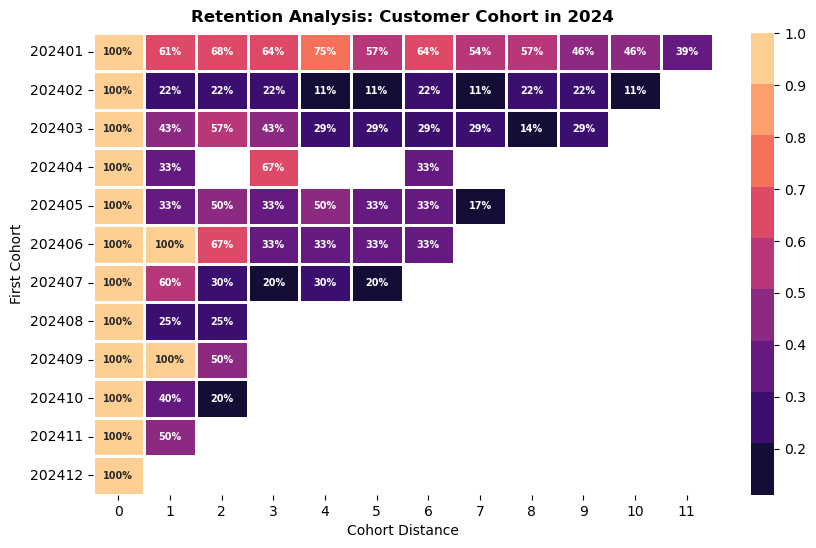

In [135]:
# Visualize to Diagram
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(10,6))
# Create diagram
sns.heatmap(cohort_pvt, annot=True, fmt='.0%', annot_kws={'size':7,
                                                          'weight':'bold',
                                                          'fontfamily':'sans-serif'},
             mask=cohort_pvt.isnull(), linewidths=2, cmap=sns.color_palette('magma',(9)))

plt.title('Retention Analysis: Customer Cohort in 2024',pad=8,fontweight='bold')

plt.show()